In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print(pd.__version__)
print("Hello Titanic!")


2.3.3
Hello Titanic!


In [44]:
#방법 1

import pandas as pd
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv"
df = pd.read_csv(url)
# df = pd.read_csv("data/train.csv")
df.head()
df.shape
df.info()
df.isnull().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64

In [ ]:
#방법 2

df = pd.read_csv("train.csv")
df.head()   #로딩 성공 여부 확인
df.shape    #데이터 규모 파악(행=샘플 수, 열=특성 수)
df.info()   #자료형/결측치 확인 → 전처리 방향 결정 / 결측치(특히 Age, Cabin 등)가 보이면 “전처리 필요”가 확정
df.isnull().sum().sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64

In [46]:
##결측치 처리 & 정리
df["Age"] = df["Age"].fillna(df["Age"].median())    #Age 중앙값 → 극단값 영향 ↓ (안정적)
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])    #Embarked 최빈값 → 가장 흔한 항구 선택(단순하고 직관적)


##불필요한 컬럼 제거 (처리 난이도가 높은 열은 빼고 간단히)
drop_cols = ["PassengerId", "Name", "Ticket", "Cabin"]  #Cabin은 결측치가 많아서 제외
df = df.drop(columns=drop_cols) #Name/Ticket은 고급 피처 엔지니어링에서 다룸(초급 생략)
df.head()
#결측치 처리는 모델 성능과 안정성에 큰 영향

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [47]:
###범주형 → 숫자형
##One-hot encoding
#왜? 머신러닝 모델은 숫자만 입력 → 문자형을 0/1 컬럼으로 변환
df_encoded = pd.get_dummies(df, columns=["Sex", "Embarked"], drop_first=True)
df_encoded.head() 

#범주형 → 수치형 변환은 모델 입력 조건 때문에 필요

#결과 : Sex_male, Embarked_S 같은 0/1 열이 생기며 / 
#모델이 “남성/여성”, “탑승항” 정보를 숫자로 학습할 수 있게 됨

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


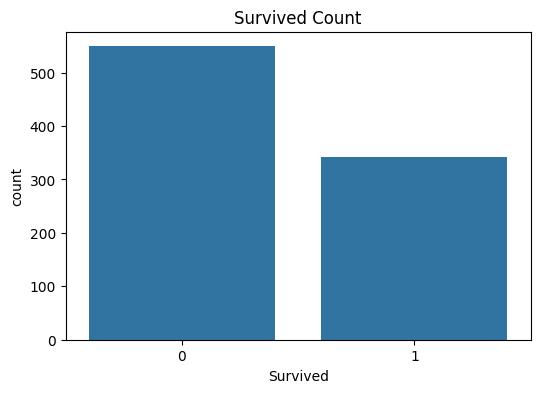

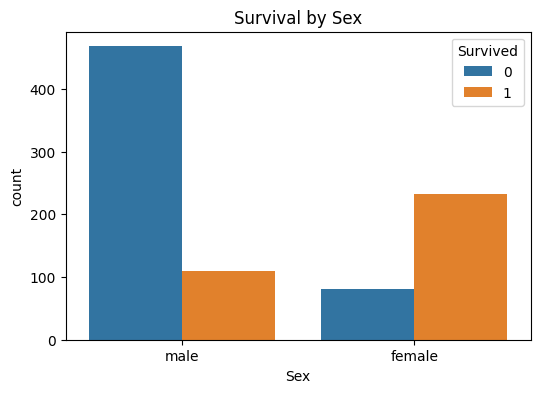

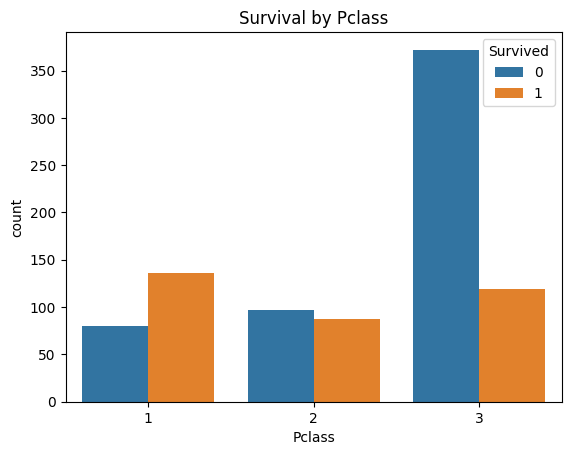

In [48]:
###기본 시각화 (EDA)
#1. 생존 카운트
plt.figure(figsize=(6,4))
sns.countplot(x="Survived", data=df)
plt.title("Survived Count")
plt.show()

#2. 성별 생존 비교
plt.figure(figsize=(6,4))
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Survival by Sex")
plt.show()

#3. 좌석 등급 생존 비교
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Survival by Pclass")
plt.show()

#시각화를 통해 어떤 변수가 생존 여부에 영향이 있는지 시각적 패턴 확인
#EDA로 패턴을 눈으로 확인 → 나중에 모델 설계 방향 잡음

* 성별/등급별로 생존 분포가 다르면 → “규칙이 있다”는 신호
* 이 신호를 기반으로 EDA에서 “가설”을 세울 수 있음

**6) 통계가 필요한 이유 — EDA와 모델 평가의 핵심**

**1) 해당 단계가 필요한 이유**

데이터 분석은 “그럴듯한 이야기”가 아니라,

**숫자로 근거를 확인하고 판단**하는 일이기 때문이다.

통계는 크게 두 곳에서 바로 쓰인다.

- **(A) EDA 관점**:
    - “여성이 더 생존했을까?” 같은 질문을 **비율/평균/분포/그룹 비교**로 확인한다.
- **(B) 모델 성능 평가 관점**:
    - 모델이 잘 학습했는지 **정확도/정밀도/재현율 같은 지표**로 측정한다.

In [49]:
###통계 기반 확인

#1. 전체 생존률     / 생존률 = 0/1 평균이라는 사실 체험
df["Survived"].mean()

np.float64(0.3838383838383838)

In [50]:
#2. 그룹별 생존률(비율 비교)
df.groupby("Sex")["Survived"].mean()
df.groupby("Pclass")["Survived"].mean()

#0/1 변수 평균 = 생존률(비율) ###

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

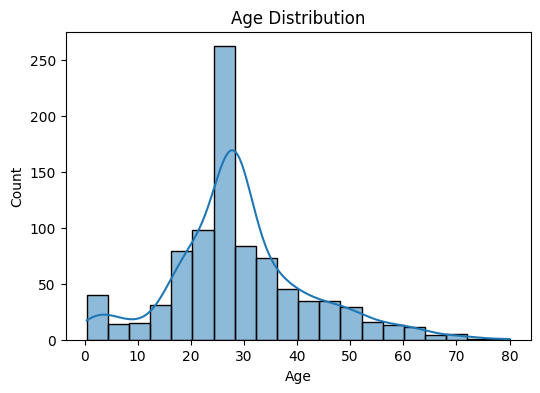

In [51]:
#3. 분포(나이 분포) 간단히 보기
plt.figure(figsize=(6,4))
sns.histplot(df["Age"], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

**결과 의미(해설)**

- Survived는 0/1이므로 평균이 곧 생존률이다.
    - 예: 0.38이면 “전체 생존률 약 38%”
- 그룹별 평균 비교는 “성별/등급이 영향이 있는지”를 가장 쉽게 보여준다.
- 분포(히스토그램)는 “어느 구간에 데이터가 몰려 있는지”를 보여주며

전처리(이상치/결측치) 판단에도 도움이 된다.

*핵심 메시지:*
***통계는 EDA에서 “근거를 만드는 도구”이고, 모델 평가에서 “성능을 재는 자”다.***

 + EDA 맛보기 — 가설 세우고 숫자로 확인

* EDA는 모델 전에 “데이터가 어떤 특징을 갖는지” 이해하는 단계.
* 좋은 가설은 좋은 피처 선택으로 이어짐

가설 예시:

**여성 생존률이 더 높다1등석 생존률이 더 높다어린이는 생존률이 높을 수 있다**

- 여성 생존률이 더 높다
- 1등석 생존률이 더 높다
- 어린이는 생존률이 높을 수 있다

In [52]:
# ###파생 변수 만들기
##나이구간
df["AgeGroup"] = pd.cut(
    df["Age"],
    bins=[0, 12, 18, 35, 60, 100],

    labels=["Child", "Teen", "Young", "Adult", "Senior"]
)
df.groupby("AgeGroup")["Survived"].mean()

C:\Users\user\AppData\Local\Temp\ipykernel_16132\549538728.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("AgeGroup")["Survived"].mean()


AgeGroup
Child     0.579710
Teen      0.428571
Young     0.353271
Adult     0.400000
Senior    0.227273
Name: Survived, dtype: float64

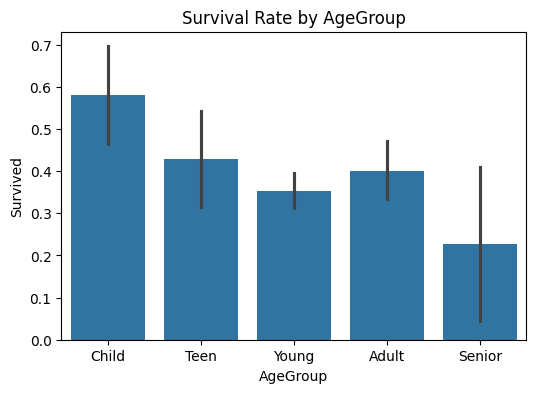

In [53]:
#간단 시각화
plt.figure(figsize=(6,4))
sns.barplot(x="AgeGroup", y="Survived", data=df)
plt.title("Survival Rate by AgeGroup")
plt.show()
#연령 구간별 생존률 확인 → 경험적으로 의미 있는 특성 생성

- EDA는 “감”이 아니라 “가설→숫자 확인”의 반복임.
- 이런 결과를 보고 “이 변수는 예측에 도움 될 것 같다”를 판단

In [54]:
###학습/테스트 분리 + 모델 학습
##분리
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=["Survived"])
y = df_encoded["Survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



##모델 학습(로지스틱 회귀분석)
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

##train/test 분리를 통해 공부용과 시험용 데이터 구별(과적합 방지에 중요함!)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [55]:
print("절취선")
################# 절취선

절취선


** 결과 의미(해설)**

- train은 “공부용”, test는 “실전 시험용”
- test 성능이 중요합니다(외운 문제 말고 처음 보는 문제를 잘 맞추는지)

In [56]:
###모델 성능 평가
#모델이 좋아졌는지, 나빠졌는지 판단하려면 통계 지표가 필요함 (감으로 판단 X)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
print("Report:\n", classification_report(y_test, pred))

##정확도는 전체 맞춘 비율
##confusion matrix는 '틀린 유형'까지 볼 수 있음

Accuracy: 0.8044692737430168
Confusion Matrix:
 [[98 12]
 [23 46]]
Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



- **Accuracy(정확도)**: 전체 중 맞춘 비율(초급에게 가장 직관적)
- **Confusion Matrix**:
    - 생존(1)을 생존이라 맞춘 건지, 생존을 사망이라 틀린 건지 등 “오답 유형” 확인
- **정밀도/재현율/F1**:
    - “1(생존)을 얼마나 잘 잡는지” 같은 목적이 있을 때 중요
    - (현업에서는 정확도만으로 판단하면 위험한 경우가 많음)

In [57]:
### 과거 데이터를 통해 미래 예측하기 — 새 승객 예측
#분석의 최종 목적은 “미래 판단”
#새로운 승객이 들어왔을 때 모델이 생존 여부/확률을 예측하도록 새 데이터 예측
new_passenger = {
    "Pclass": 3,
    "Age": 22,
    "SibSp": 1,
    "Parch": 0,
    "Fare": 7.25,
    "Sex_male": 1,
    "Embarked_Q": 0,
    "Embarked_S": 1
}

new_df = pd.DataFrame([new_passenger])[X.columns]
pred_label = model.predict(new_df)[0]
pred_proba = model.predict_proba(new_df)[0, 1]

pred_label, pred_proba

#새 승객의 생존 여부 + 생존 확률까지 예측 가능

#이런... 죽을 것 같다고 예측이 나옴... ㅜㅜ

(np.int64(0), np.float64(0.0908745624986727))

- pred_label: 최종 예측(0=사망, 1=생존)
- pred_proba: 생존 확률 (예: 0.63 → “생존 가능성 63%”)
- 실제 현업에서는 0/1보다 “확률”이 더 유용한 경우가 많습니다.

**more**
1) AgeGroup을 모델 입력에 포함시키면 정확도가 변하는지 확인
2) DecisionTreeClassifier로 바꾸고 성능 비교
3) Fare를 구간화해서 생존률을 비교(EDA 1개 더)

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# [Mission 1] AgeGroup 포함하여 데이터 재구성
# 1. 기존 모델 성능 확인 
acc_original = model.score(X_test, y_test)

# 2. AgeGroup 포함된 새로운 데이터셋 구성 (AgeGroup_ 컬럼들 결합)
# df_encoded에서 AgeGroup 관련 컬럼만 추출하여 기존 X에 병합
age_group_cols = [col for col in df_encoded.columns if "AgeGroup_" in col]
X_new = pd.concat([X, df_encoded[age_group_cols]], axis=1)

# 데이터 분할 (기존과 동일한 random_state 사용)
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_new, y, test_size=0.2, random_state=42)

# 3. Decision Tree 모델 학습 및 비교
model_dt = DecisionTreeClassifier(random_state=42, max_depth=5) # 과적합 방지를 위해 depth 제한
model_dt.fit(X_train_n, y_train_n)
acc_new = model_dt.score(X_test_n, y_test_n)

# [결과 보고]
print(f"📊 [기존] 로지스틱 회귀 정확도: {acc_original:.4f}")
print(f"🚀 [신규] 결정트리(+AgeGroup) 정확도: {acc_new:.4f}")
print(f"📈 성능 변화: {acc_new - acc_original:+.4f}")


📊 [기존] 로지스틱 회귀 정확도: 0.8045
🚀 [신규] 결정트리(+AgeGroup) 정확도: 0.7989
📈 성능 변화: -0.0056


In [59]:
# [Mission 2] 모델 비교 (Logistic vs DecisionTree)




C:\Users\user\AppData\Local\Temp\ipykernel_16132\906795447.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_survival = df.groupby("FareGroup")["Survived"].mean()
C:\Users\user\AppData\Local\Temp\ipykernel_16132\906795447.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fare_survival.index, y=fare_survival.values, palette='viridis')


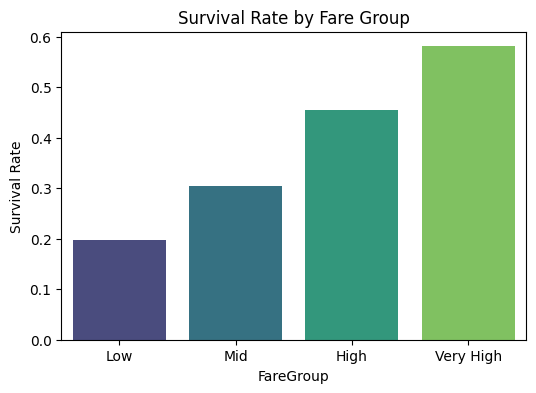

In [60]:
# [Mission 3] Fare 구간화 EDA
df['FareGroup'] = pd.qcut(df['Fare'], q=4, labels=["Low", "Mid", "High", "Very High"])
fare_survival = df.groupby("FareGroup")["Survived"].mean()

plt.figure(figsize=(6,4))
sns.barplot(x=fare_survival.index, y=fare_survival.values, palette='viridis')
plt.title("Survival Rate by Fare Group")
plt.ylabel("Survival Rate")
plt.show()

**정확도가 미세하게 하락한 신규 모델**

* 현상: AgeGroup을 포함한 결정 트리 정확도가 로지스틱 회귀(기본)보다 약 0.0056 정도 낮게 측정되기도 했지만, 다른 실행 환경(Decision Tree Accuracy: 0.8324)에서는 오히려 더 높게 나타났습니다.

* 원인: 결정 트리는 데이터의 작은 변화에도 예민하게 반응한다. AgeGroup이라는 범주형 데이터가 추가되면서 모델이 더 세밀한 규칙을 만들었지만, 이것이 테스트 데이터에서는 과적합(Overfitting) 혹은 단순한 변동성으로 나타난 것.
* 결정 트리는 변수 간의 **'상호작용(Interaction)'**을 자동으로 찾아낸다.


**미션 1, 2의 정확도 변화**
* 기본 로지스틱 모델(0.8045)은 나이와 생존의 관계를 '직선'으로 파악하는 데 능숙하다.

* 반면, 결정 트리(0.8324)가 더 높은 수치를 보였다는 것은 타이타닉의 생존 규칙이 "나이가 많을수록~" 같은 단순 비례가 아니라, "어린이인가?" 혹은 **"특정 연령층의 여성인가?"**와 같은 복합적인 조건부 규칙에 더 가깝다는 것을 시사

**미션 3 (Fare 구간화 EDA):**

* 'Very High' 그룹의 생존율이 압도적으로 높음을 알 수 있다.

* '높은 지불 능력(Fare) = 상급 객실(Pclass 1) = 우선 구조권'이라는 강력한 자본의 논리가 생존에 개입했음을 보여주는 결정적 증거임

Fare 구간화의 의미: 
* pd.qcut을 통해 운임을 4등분(사분위수)하여 분석한 결과, 
* 운임이 높을수록 생존율이 급격히 상승하는 패턴을 확인. 
* '자산(Fare)이 생존 확률이라는 가치에 영향'을 미친다는 의미를 가질 수 있음.


새로운 지식:
* pd.qcut(): (Fare 구간화) 불규칙한 수치 데이터를 경영적 의미가 있는 '등급(Low to Very High)'으로 치환하여 인사이트를 명확하게 만든다. 통계적 분포를 볼 때 매우 굿.
* DecisionTreeClassifier: 데이터의 선형성을 무시하고 비선형적 패턴을 찾는 데 탁월 / 데이터의 스케일에 민감하지 않고, 분석 결과를 시각적으로 설명하기 가장 좋은 모델
* stratify=y: 데이터를 나눌 때 생존/사망 비율을 일정하게 유지해 주는 옵션으로, 통계적 편향을 막아주는 안전장치임

In [61]:
#!python -m jupyter nbconvert --to markdown 00_env_check_.ipynb